In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
ds = pd.read_csv('new_cleaned_data.csv')
print(ds.to_string())

     Unnamed: 0                                      name     company  year      Price  kms_driven fuel_type
0             0              Santro Xing XO eRLX Euro III     Hyundai  2007    80000.0       45000    Petrol
1             3            Grand i10 Magna 1.2 Kappa VTVT     Hyundai  2014   325000.0       28000    Petrol
2             4               EcoSport Titanium 1.5L TDCi        Ford  2014   575000.0       36000    Diesel
3             6                                      Figo        Ford  2012   175000.0       41000    Diesel
4             7                                       Eon     Hyundai  2013   190000.0       25000    Petrol
5             8               EcoSport Ambiente 1.5L TDCi        Ford  2016   830000.0       24530    Diesel
6             9                   Suzuki Alto K10 VXi AMT      Maruti  2015   250000.0       60000    Petrol
7            10                     Fabia Classic 1.2 MPI       Skoda  2010   182000.0       60000    Petrol
8            11    

# Distribution of Car Prices

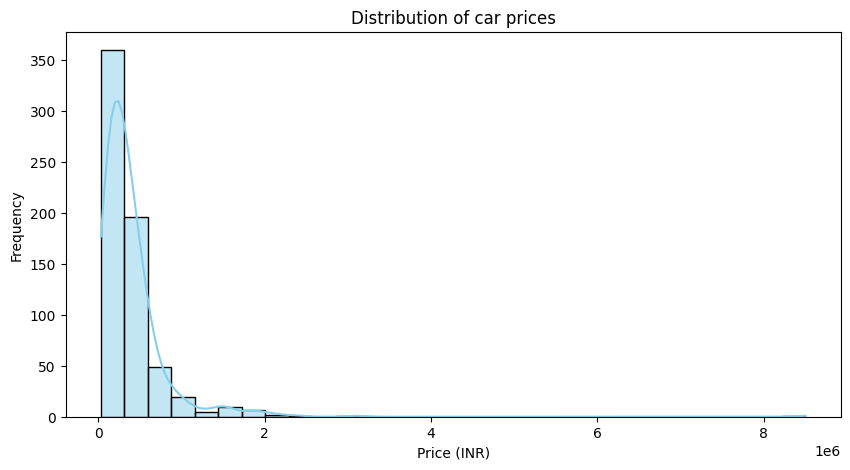

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(ds['Price'] , bins=30 , kde=True , color='skyblue')
plt.title('Distribution of car prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

Interpretation : The graph shows how car prices are spread. 
    A right-skew indicates most cars are in the lower price range

# Cars by Manufacturing Year

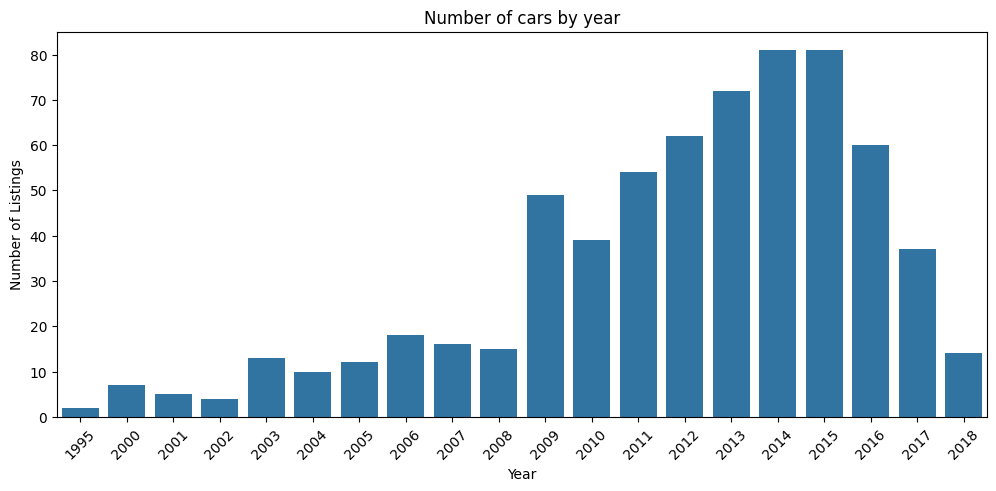

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(data=ds , x='year' , order=sorted(ds['year'].unique()))
plt.xticks(rotation=45)
plt.title('Number of cars by year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.show()

Interpretation : Most listed cars are from recent years.
Older cars are fewer due to wear or less demand

# KMs Driven vs. Price(Scatter Plot)

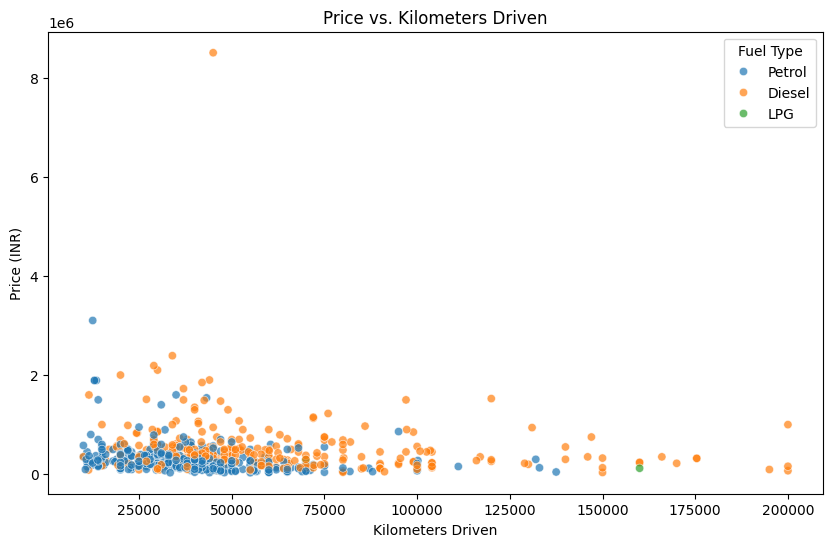

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ds , x='kms_driven', y='Price', hue='fuel_type', alpha=0.7)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.legend(title='Fuel Type')
plt.show()

Interpretation : Price generally drops as the kilometers increase.
    Fuel type may also influence price trends

# Top 10 Most Listed Car Brands

C:\Users\ankit\AppData\Local\Temp\ipykernel_8564\2058531770.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


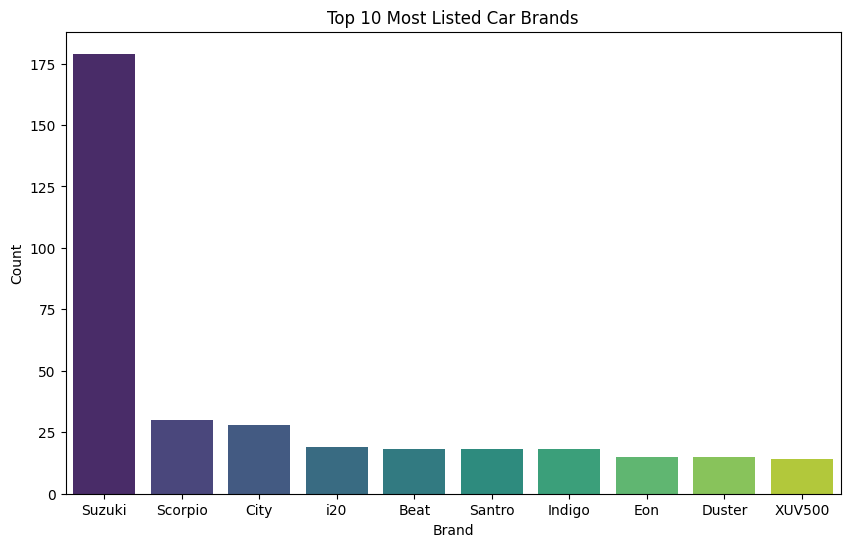

In [17]:
ds['brand']= ds['name'].str.split().str[0] # Extract brand

top_brands = ds['brand'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Most Listed Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

Interpretation : These are the most common car brands on the platform.
    Helps understand market trends. Suzuki is the most demanding brand

# Price Comparison of Brands (Boxplot)

C:\Users\ankit\AppData\Local\Temp\ipykernel_8564\1240921242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ds[ds['brand'].isin(top5)] ,


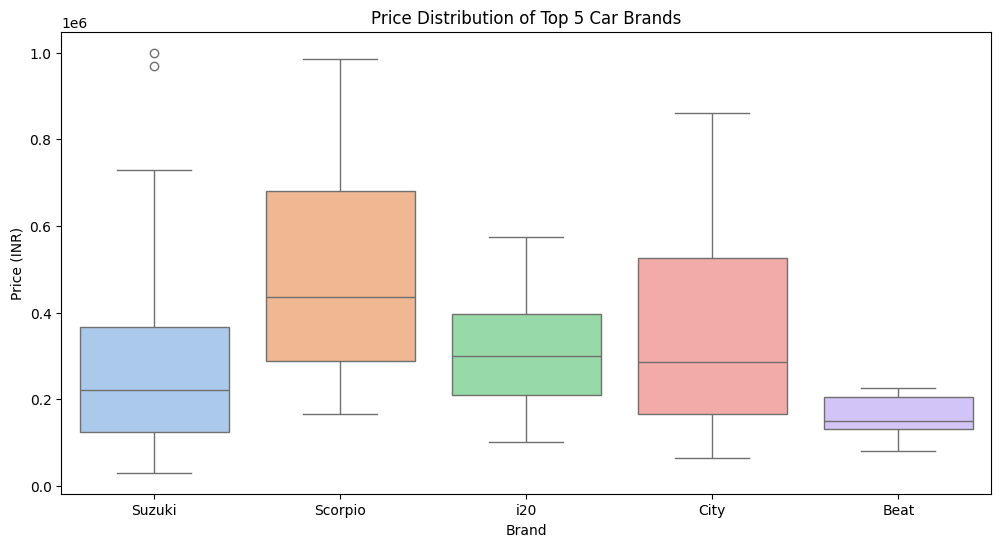

In [18]:
top5 = ds['brand'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=ds[ds['brand'].isin(top5)] , 
           x='brand' , y='Price' , palette='pastel')
plt.title('Price Distribution of Top 5 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.show()

 Interpretation:
 
This shows the price range and outliers per brand. Some brands have higher price variability.
Santro targets the lower-budget segment.
City and Scorpio Brand attract premium buyyers, these brands may have more models/variants.

# Fuel Type Distribution


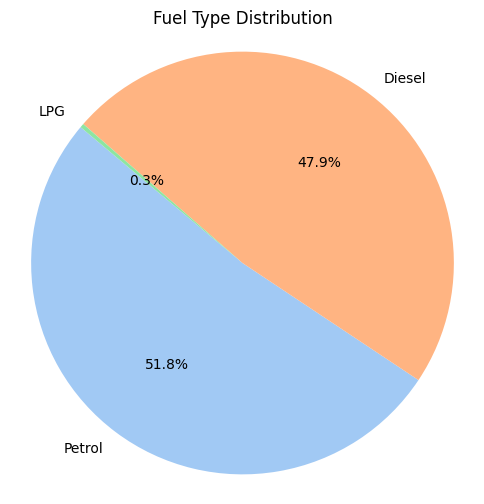

In [20]:
fuel_counts = ds['fuel_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution')
plt.axis('equal')  # Equal aspect ratio
plt.show()

Interpretation:
It Reveals fuel types Petrol is most common among listed cars.

# Average Price by Fuel Type


C:\Users\ankit\AppData\Local\Temp\ipykernel_8564\2504908756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ds, x='fuel_type', y='Price', estimator='mean', palette='Accent')


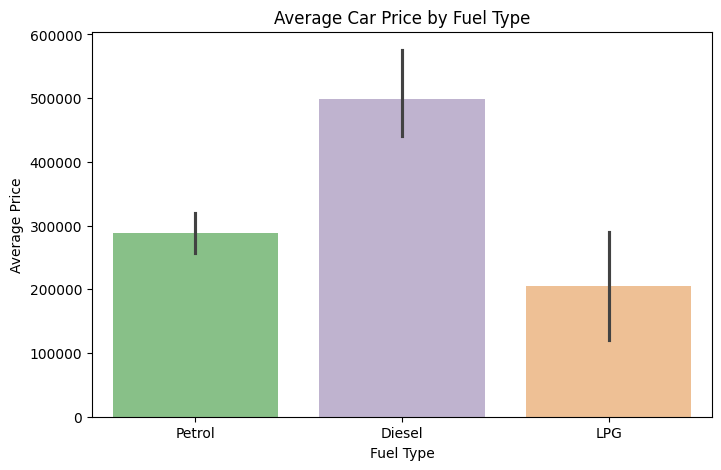

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=ds, x='fuel_type', y='Price', estimator='mean', palette='Accent')
plt.title('Average Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

 Interpretation:
Reveals which fuel type tends to have higher average price. Diesel or hybrid cars may often be priced higher.

# Relationship Between Year and Price


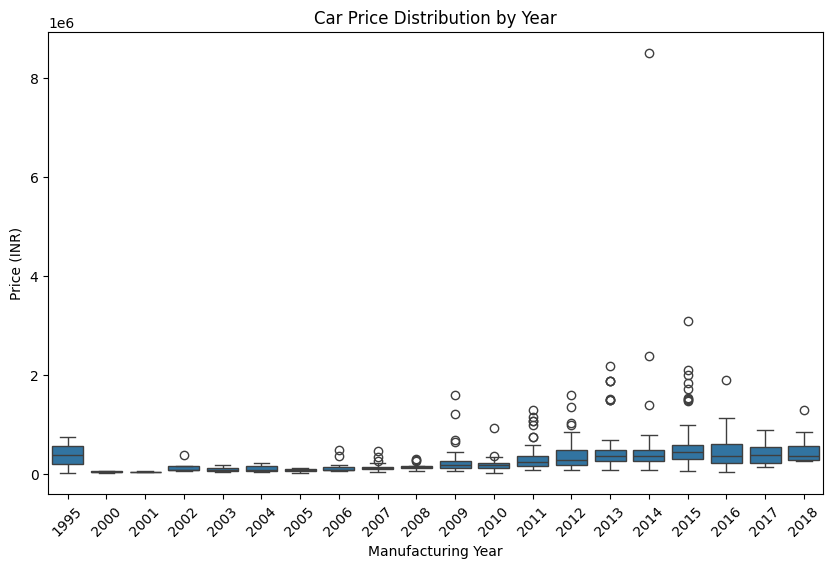

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ds, x='year', y='Price')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (INR)')
plt.show()

Interpretation:
Shows how price varies with car age. Usually, newer models have higher prices.

# Price Trend Over Years (Mean Price per Year)

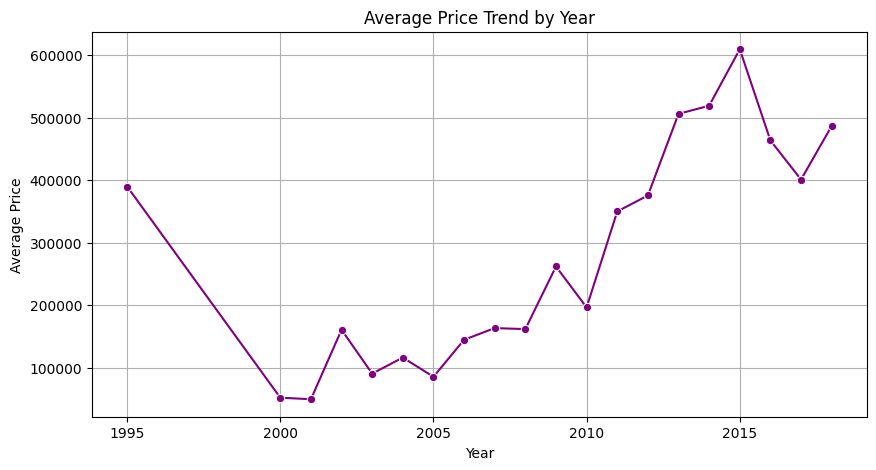

In [29]:
avg_price_by_year = ds.groupby('year')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_by_year, x='year', y='Price', marker='o', color='purple')
plt.title('Average Price Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Interpretation:
Helps identify how car prices have changed over the years. Useful for trend analysis.

# Correlation Heatmap


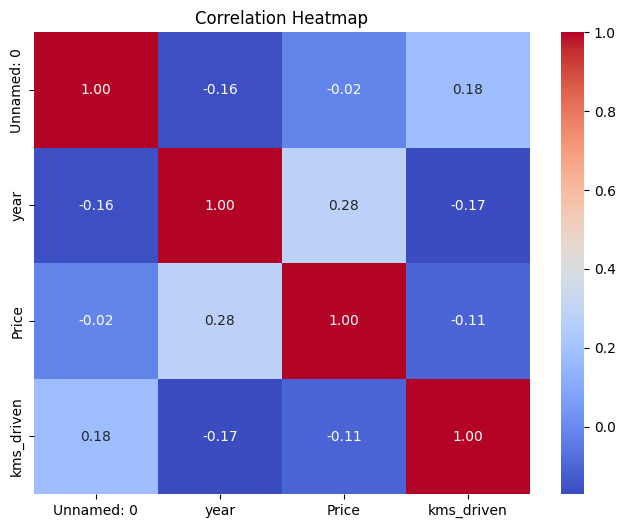

In [31]:
plt.figure(figsize=(8,6))
numeric_cols = ds.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()